In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [2]:
import os
import pandas as pd
import medvqa
from medvqa.utils.files import load_pickle
from medvqa.evaluation.results import get_report_level_metrics_dataframe

In [82]:
df = get_report_level_metrics_dataframe('mimiccxr')

In [64]:
df['bleu'] = (df['b1'] + df['b2'] + df['b3'] + df['b4']) / 4

In [66]:
df['metrics_path_short'] = [os.path.basename(x)[-50:] for x in df['metrics_path']]

In [67]:
df.columns

Index(['b1', 'b2', 'b3', 'b4', 'bert_score_f1', 'bert_score_p', 'bert_score_r',
       'cD', 'chxb_acc', 'chxb_f1(A)',
       ...
       'vm-frozen', 'mergef', 'medtok', 'amp', 'aug', 'gradacc_iters',
       'ensemble', 'input_labels', 'bleu', 'metrics_path_short'],
      dtype='object', length=160)

In [68]:
# df_aux = df.sort_values(['exp_timestamp'], ascending=False)
df_aux = df.sort_values(['modif_time'], ascending=False)
# df_aux = df.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux[['folder', 'modif_time', 'exp_timestamp', 'model', 'ensemble', 'input_labels', 'medtok', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'epoch', 'eval_mode', 'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_f1(sample)', 'bleu', 'cD', 'rg-L', 'met']]
df_aux = df_aux[['folder', 'metrics_path_short', 'modif_time', 'exp_timestamp', 'model', 'datasets', 'eval_mode',
                 'chxp_f1(macro)', 'chxb_f1(macro)',
#                  'chxp_f1(micro)', 'chxb_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(sample)',
                 'radgraph_f1(sample)', 'radgraph_jaccard(sample)',
#                  'radgraph_p(sample)', 'radgraph_r(sample)',
                 'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_p', 'fact_embedding_r',
                 'bert_score_f1', # 'bert_score_p', 'bert_score_r',
#                  'bleu', 'cD', 'rg-L', 'met',
                ]]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('qclass')]
df_aux[:10]
# df_aux[(0.45 < df_aux['f1(macro)']) & (df_aux['f1(macro)'] < 0.5)]
# df_aux[:55][df_aux.columns[:15]]

,folder,metrics_path_short,modif_time,exp_timestamp,model,datasets,eval_mode,chxp_f1(macro),chxb_f1(macro),radgraph_f1(sample),radgraph_jaccard(sample),fact_embedding_soft,fact_embedding_f1,fact_embedding_p,fact_embedding_r,bert_score_f1
287,phrase_grounding,"port_gen_metrics(chexpert,tuned_thresholds,v1)...",2024-04-30 23:13:36,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.437503,0.427113,0.122644,0.067169,0.615927,0.406090,0.525432,0.361732,0.481878
285,phrase_grounding,"mimic_cxr_lt+chest_imagenome,tuned_thresholds)...",2024-04-30 18:15:22,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.406709,0.342747,0.049880,0.025717,0.649073,0.407469,0.399386,0.491618,0.263093
284,phrase_grounding,"_gen_metrics(chest_imagenome,tuned_thresholds)...",2024-04-30 17:49:52,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.372040,0.316035,0.049652,0.025606,0.641591,0.395743,0.389037,0.474293,0.232772
286,phrase_grounding,"ort_gen_metrics(mimic_cxr_lt,tuned_thresholds)...",2024-04-30 17:27:36,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.414775,0.286129,0.077808,0.040958,0.624296,0.392420,0.480586,0.367359,0.374768
283,phrase_grounding,"_report_gen_metrics(chexpert,tuned_thresholds)...",2024-04-30 17:23:41,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.385771,0.308175,0.091541,0.048689,0.615851,0.391133,0.499974,0.350250,0.399711
234,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:37:51,20231006_012451,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.826383,0.843711,0.414482,0.268264,0.943410,0.973685,0.983328,0.965943,0.890250
239,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:24:38,20231006_011239,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.685846,0.746556,0.307431,0.185848,0.896501,0.932327,0.938624,0.927950,0.875174
245,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:12:26,20231006_010441,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.634994,0.670604,0.255650,0.149796,0.836137,0.832114,0.839330,0.829116,0.866813
242,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:04:28,20231006_005349,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.632871,0.670732,0.240523,0.139654,0.833207,0.831063,0.840075,0.826357,0.865164
272,report_gen,"l_mode=template-based,chexbert-labels--oracle)...",2023-10-05 16:43:22,20231005_164140,oracle,1:mimiccxr,"template-based,chexbert-labels--oracle",0.920525,0.906746,0.122158,0.066918,0.663651,0.453688,0.677324,0.370895,0.848637


In [69]:
_dataframe_rows = [
#     df.loc[(df['exp_timestamp'] == '20231005_161501') & (df['modif_time'] == '2023-10-05 16:18:55')].iloc[0],
    
#     df.loc[(df['exp_timestamp'] == '20231006_012451') & (df['modif_time'] == '2023-10-06 01:37:51')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_011239') & (df['modif_time'] == '2023-10-06 01:24:38')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_010441') & (df['modif_time'] == '2023-10-06 01:12:26')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_005349') & (df['modif_time'] == '2023-10-06 01:04:28')].iloc[0],
    
#     df.loc[(df['exp_timestamp'] == '20231005_164140') & (df['modif_time'] == '2023-10-05 16:43:22')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231005_163629') & (df['modif_time'] == '2023-10-05 16:38:26')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231005_162957') & (df['modif_time'] == '2023-10-05 16:34:05')].iloc[0],
    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 18:15:22')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:49:52')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:27:36')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:23:41')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 23:13:36')].iloc[0],    
    

#     df.loc[(df['exp_timestamp'] == '20230830_175739') & (df['modif_time'] == '2023-08-30 17:59:20')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_175542') & (df['modif_time'] == '2023-08-30 17:57:18')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_175143') & (df['modif_time'] == '2023-08-30 17:55:29')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_174854') & (df['modif_time'] == '2023-08-30 17:50:36')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230831_233901') & (df['modif_time'] == '2023-08-31 23:54:37')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231001_194409') & (df['modif_time'] == '2023-10-01 19:56:53')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231001_204513') & (df['modif_time'] == '2023-10-01 20:46:44')].iloc[0],
]
_method_aliases = [
#     'Fact Extractor (T5)',
    
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=50000)',
#     'CXR Fact Encoder (obs=1000, al=300, nlabels=10000)',
#     'CXR Fact Encoder (obs=200, al=50, nlabels=5000)',
#     'CXR Fact Encoder (obs=200, al=50, nlabels=1000)',
    
#     'CheXbert (template-based)',
#     'CheXpert labeler (template-based)',
#     'Chest ImaGenome (template-based)',
    
    'Phrase Grounding (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Phrase Grounding (template-based, ChestImaGenome (78 facts))',
    'Phrase Grounding (template-based, MIMIC_CXR_LT (26 facts))',
    'Phrase Grounding (template-based, CheXpert (14 facts))',
    'Phrase Grounding (template-based (pdpino), CheXpert (14 facts))',
    
#     'CheXbert',
#     'CheXpert labeler',
#     'Chest ImaGenome',
#     'CXR Fact Encoder (obs=4000, al=300, nlabels=5000)',
#     'CXR Fact Encoder (obs=8000, al=300, nlabels=10000)',
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=20000)',
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=20000) v2',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [3]:
from medvqa.evaluation.plots import plot_per_class_classification_metrics

ImportError: cannot import name 'plot_per_class_classification_metrics' from 'medvqa.evaluation.plots' (/home/pamessina/medvqa/medvqa/evaluation/plots.py)

In [4]:
%matplotlib inline

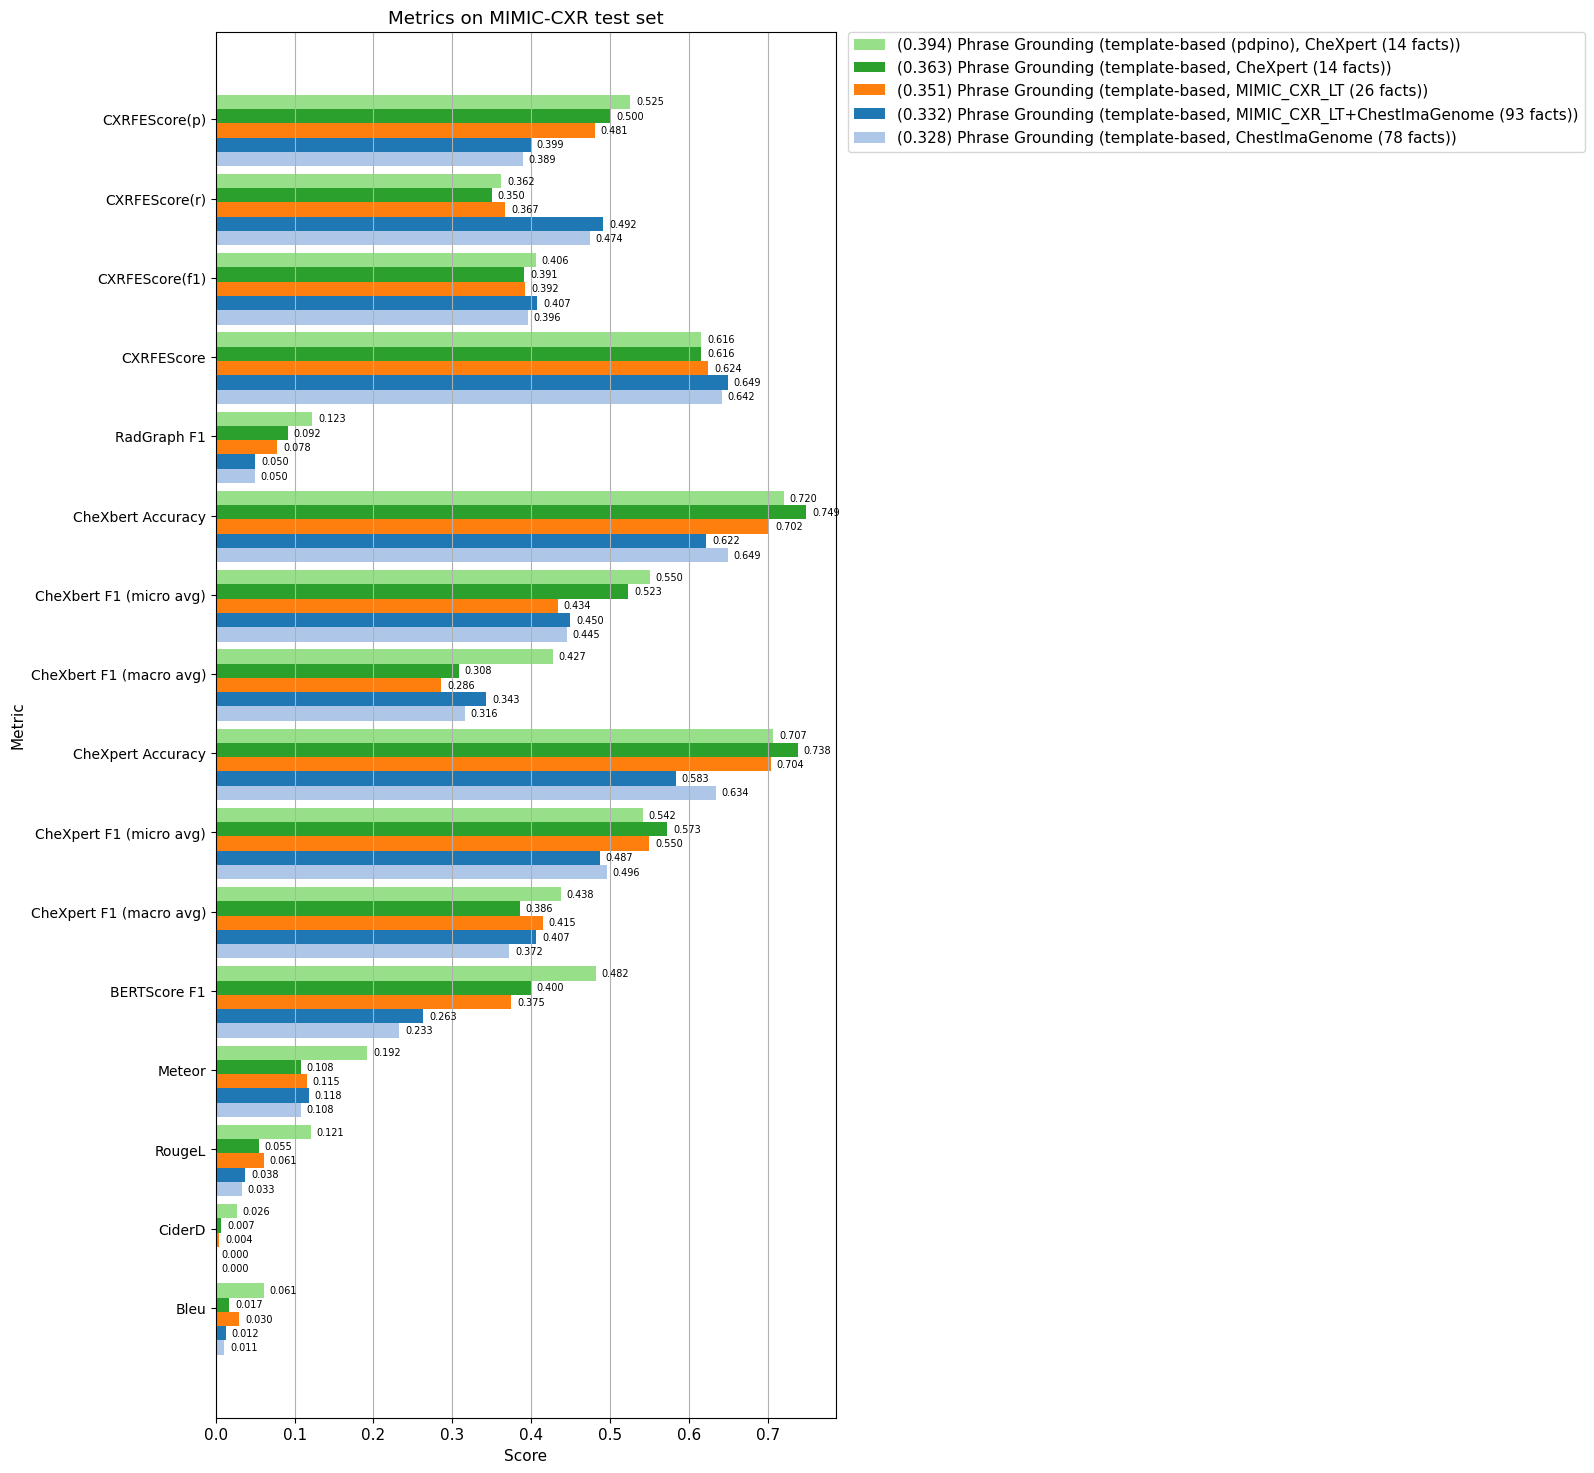

In [72]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_per_class_classification_metrics(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='MIMIC-CXR test set',
    figsize=(8, 18),
    sort_metrics=False,
)

In [9]:
from importlib import reload
import medvqa

In [13]:
reload(medvqa.evaluation.results)

<module 'medvqa.evaluation.results' from '/home/pamessina/medvqa/medvqa/evaluation/results.py'>

In [14]:
from medvqa.evaluation.results import get_report_level_metrics_dataframe

In [15]:
df = get_report_level_metrics_dataframe('interpret')

['20240511_232138_fact_classifier_predictions2report_section(sigmoids2impression)_Seq2Seq(facebook-bart-base)', '20240511_231851_fact_classifier_predictions2report_section(sigmoids2findings)_Seq2Seq(facebook-bart-base)', '20240513_132153_fact_classifier_predictions2report_section(sigmoids2findings)_Seq2Seq(facebook-bart-base)']
   ** Not cached key: ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/seq2seq/20240511_232138_fact_classifier_predictions2report_section(sigmoids2impression)_Seq2Seq(facebook-bart-base)/interpret_cxr_test_public_report_gen_metrics(impression,fmt2024-05-12 23:49:33,first75).pkl', 1715574353.353427)
   ** Not cached key: ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/seq2seq/20240511_232138_fact_classifier_predictions2report_section(sigmoids2impression)_Seq2Seq(facebook-bart-base)/interpret_cxr_test_public_report_gen_metrics(impression,fmt2024-05-12 02:28:52,first75).pkl', 1715537370.8630207)
   ** Not cached key: ('/mnt/data/pamessina/workspa

In [16]:
df['bleu'] = (df['b1'] + df['b2'] + df['b3'] + df['b4']) / 4

In [17]:
df['metrics_path_short'] = [os.path.basename(x)[-50:] for x in df['metrics_path']]

In [18]:
df.columns

Index(['b1', 'b2', 'b3', 'b4', 'bert_score_f1', 'bert_score_p', 'bert_score_r',
       'cD', 'chxb_acc', 'chxb_f1(A)',
       ...
       'vm-frozen', 'mergef', 'medtok', 'amp', 'aug', 'gradacc_iters',
       'ensemble', 'input_labels', 'bleu', 'metrics_path_short'],
      dtype='object', length=158)

In [26]:
# df_aux = df.sort_values(['exp_timestamp'], ascending=False)
df_aux = df.sort_values(['modif_time'], ascending=False)
# df_aux = df.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux[['folder', 'modif_time', 'exp_timestamp', 'model', 'ensemble', 'input_labels', 'medtok', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'epoch', 'eval_mode', 'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_f1(sample)', 'bleu', 'cD', 'rg-L', 'met']]
df_aux = df_aux[['folder', 'metrics_path_short', 'modif_time', 'exp_timestamp', 'model', 'datasets', 'eval_mode',
                 'chxp_f1(macro)', 'chxb_f1(macro)',
#                  'chxp_f1(micro)', 'chxb_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(sample)',
                 'radgraph_f1(sample)', 'radgraph_jaccard(sample)',
#                  'radgraph_p(sample)', 'radgraph_r(sample)',
                 'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_p', 'fact_embedding_r',
                 'bert_score_f1', # 'bert_score_p', 'bert_score_r',
#                  'bleu', 'cD', 'rg-L', 'met',
                ]]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('qclass')]
df_aux[:10]
# df_aux[(0.45 < df_aux['f1(macro)']) & (df_aux['f1(macro)'] < 0.5)]
# df_aux[:55][df_aux.columns[:15]]

,folder,metrics_path_short,modif_time,exp_timestamp,model,datasets,eval_mode,chxp_f1(macro),chxb_f1(macro),radgraph_f1(sample),radgraph_jaccard(sample),fact_embedding_soft,fact_embedding_f1,fact_embedding_p,fact_embedding_r,bert_score_f1
14,seq2seq,"_metrics(findings,2024-05-13 22:20:56,first80)...",2024-05-15 04:29:31,20240513_132153,classifier,1:fact,****************,0.343961,0.342044,0.186154,0.108986,0.637955,0.458420,0.517818,0.442652,0.482321
0,phrase_grounding,"cs(similarity_based_report_retrieval,findings)...",2024-05-14 13:48:23,20240511_045927,"PhraseGrounder(dn121,128,256)",4:mim-facts+vinbig+chxp+iuxray,****************,0.322396,0.326492,0.103434,0.056569,0.549168,0.326135,0.360271,0.334293,0.457037
12,seq2seq,"trics(findings,fmt2024-05-13 01:29:50,first75)...",2024-05-13 04:04:59,20240511_231851,classifier,1:fact,****************,0.318508,0.326728,0.180033,0.104829,0.636283,0.452353,0.530430,0.422843,0.480488
10,seq2seq,"ics(impression,fmt2024-05-12 23:49:33,first75)...",2024-05-13 00:25:53,20240511_232138,classifier,1:fact,****************,0.283433,0.286115,0.186614,0.138430,0.506968,0.322282,0.424494,0.304371,0.445471
11,seq2seq,"ics(impression,fmt2024-05-12 02:28:52,first75)...",2024-05-12 14:09:30,20240511_232138,classifier,1:fact,****************,0.328929,0.333156,0.191585,0.140027,0.523828,0.326820,0.403104,0.322788,0.454790
13,seq2seq,"trics(findings,fmt2024-05-12 03:03:02,first75)...",2024-05-12 13:35:12,20240511_231851,classifier,1:fact,****************,0.286754,0.312357,0.185315,0.108454,0.636701,0.450899,0.536600,0.418108,0.482783
1,phrase_grounding,"ublic_report_gen_metrics(json_to_gpt,findings)...",2024-05-07 07:17:55,20240505_224220,"PhraseGrounder(dn121,128,256)",4:mim-facts+vinbig+chexloc+chxp,****************,0.390608,0.404659,0.083023,0.044092,0.590843,0.376065,0.383797,0.427769,0.436913
6,phrase_grounding,"+chest_imagenome,template,findings,thresholds)...",2024-05-01 14:09:48,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.373316,0.318451,0.043676,0.022444,0.657038,0.430588,0.395789,0.552263,0.240239
7,phrase_grounding,"(chest_imagenome,template,findings,thresholds)...",2024-05-01 14:03:39,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.344966,0.293754,0.044556,0.022921,0.648662,0.418999,0.385163,0.534247,0.209572
4,phrase_grounding,"ics(mimic_cxr_lt,template,findings,thresholds)...",2024-05-01 13:58:22,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.401009,0.295175,0.078552,0.041415,0.635240,0.430375,0.483127,0.425538,0.375023


In [66]:
_dataframe_rows = [    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:35:03')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:18:06')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:02:16')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 12:59:01')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_224220') & (df['modif_time'] == '2024-05-07 07:17:55')].iloc[0],
    
    df.loc[(df['exp_timestamp'] == '20240513_132153') & (df['modif_time'] == '2024-05-15 04:29:31')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240511_231851') & (df['modif_time'] == '2024-05-13 04:04:59')].iloc[0],
]
_method_aliases = [
    'Fact Classifier (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Fact Classifier (template-based, ChestImaGenome (78 facts))',
    'Fact Classifier (template-based, MIMIC_CXR_LT (26 facts))',
    'Fact Classifier (template-based (pdpino), CheXpert (14 facts))',
    'Fact Classifier (JSON to GPT-4, 93 facts heuristically filtered)',
    
    'BART-based (from Fact Classifier predictions, 80 facts, numeric template)',
    'BART-base (from Fact Classifier predictions, 75 facts, verbose template)',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [62]:
reload(medvqa.evaluation.plots)

<module 'medvqa.evaluation.plots' from '/home/pamessina/medvqa/medvqa/evaluation/plots.py'>

In [63]:
from medvqa.evaluation.plots import plot_metric_bars_per_method

In [64]:
%matplotlib inline

[0.03125, 0.09375, 0.15625, 0.21875, 0.28125, 0.34375, 0.40625, 0.46875, 0.53125, 0.59375, 0.65625, 0.71875, 0.78125, 0.84375, 0.90625, 0.96875]


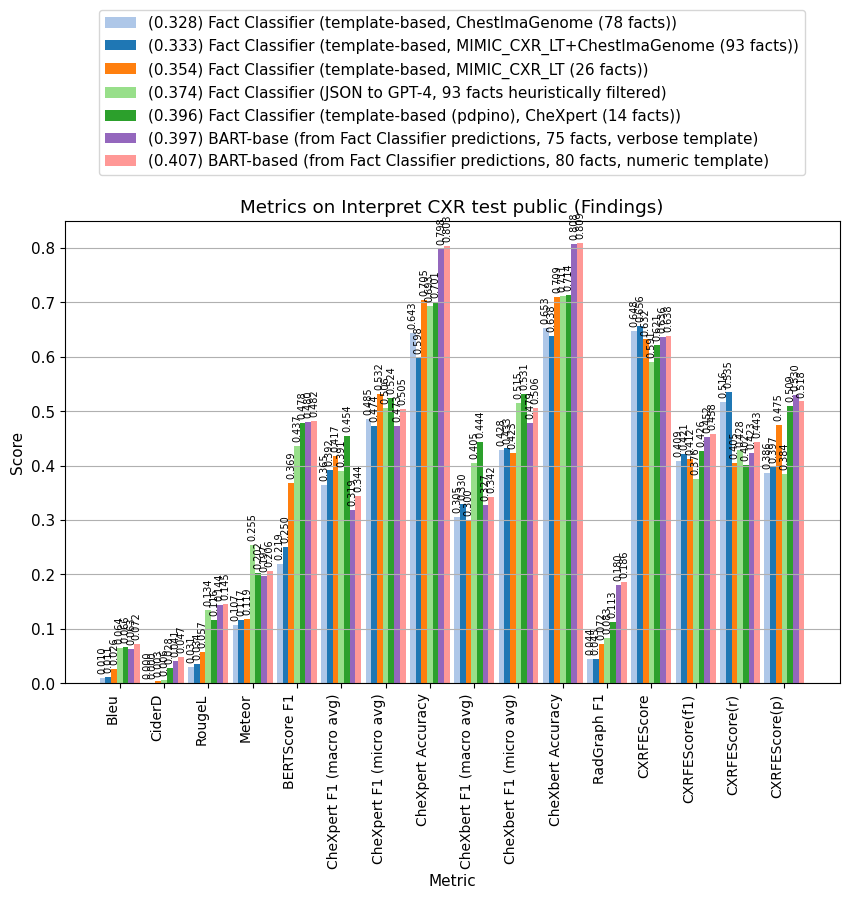

In [68]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_metric_bars_per_method(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    title='Metrics on Interpret CXR test public (Findings)',
    figsize=(10, 6),
    sort_metrics=False,
    vertical=True,
)

In [106]:
_dataframe_rows = [    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 14:09:48')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 14:03:39')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:58:22')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:56:34')].iloc[0],
]
_method_aliases = [
    'Phrase Grounding (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Phrase Grounding (template-based, ChestImaGenome (78 facts))',
    'Phrase Grounding (template-based, MIMIC_CXR_LT (26 facts))',
    'Phrase Grounding (template-based (pdpino), CheXpert (14 facts))',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [107]:
from medvqa.evaluation.plots import plot_per_class_classification_metrics

In [108]:
%matplotlib inline

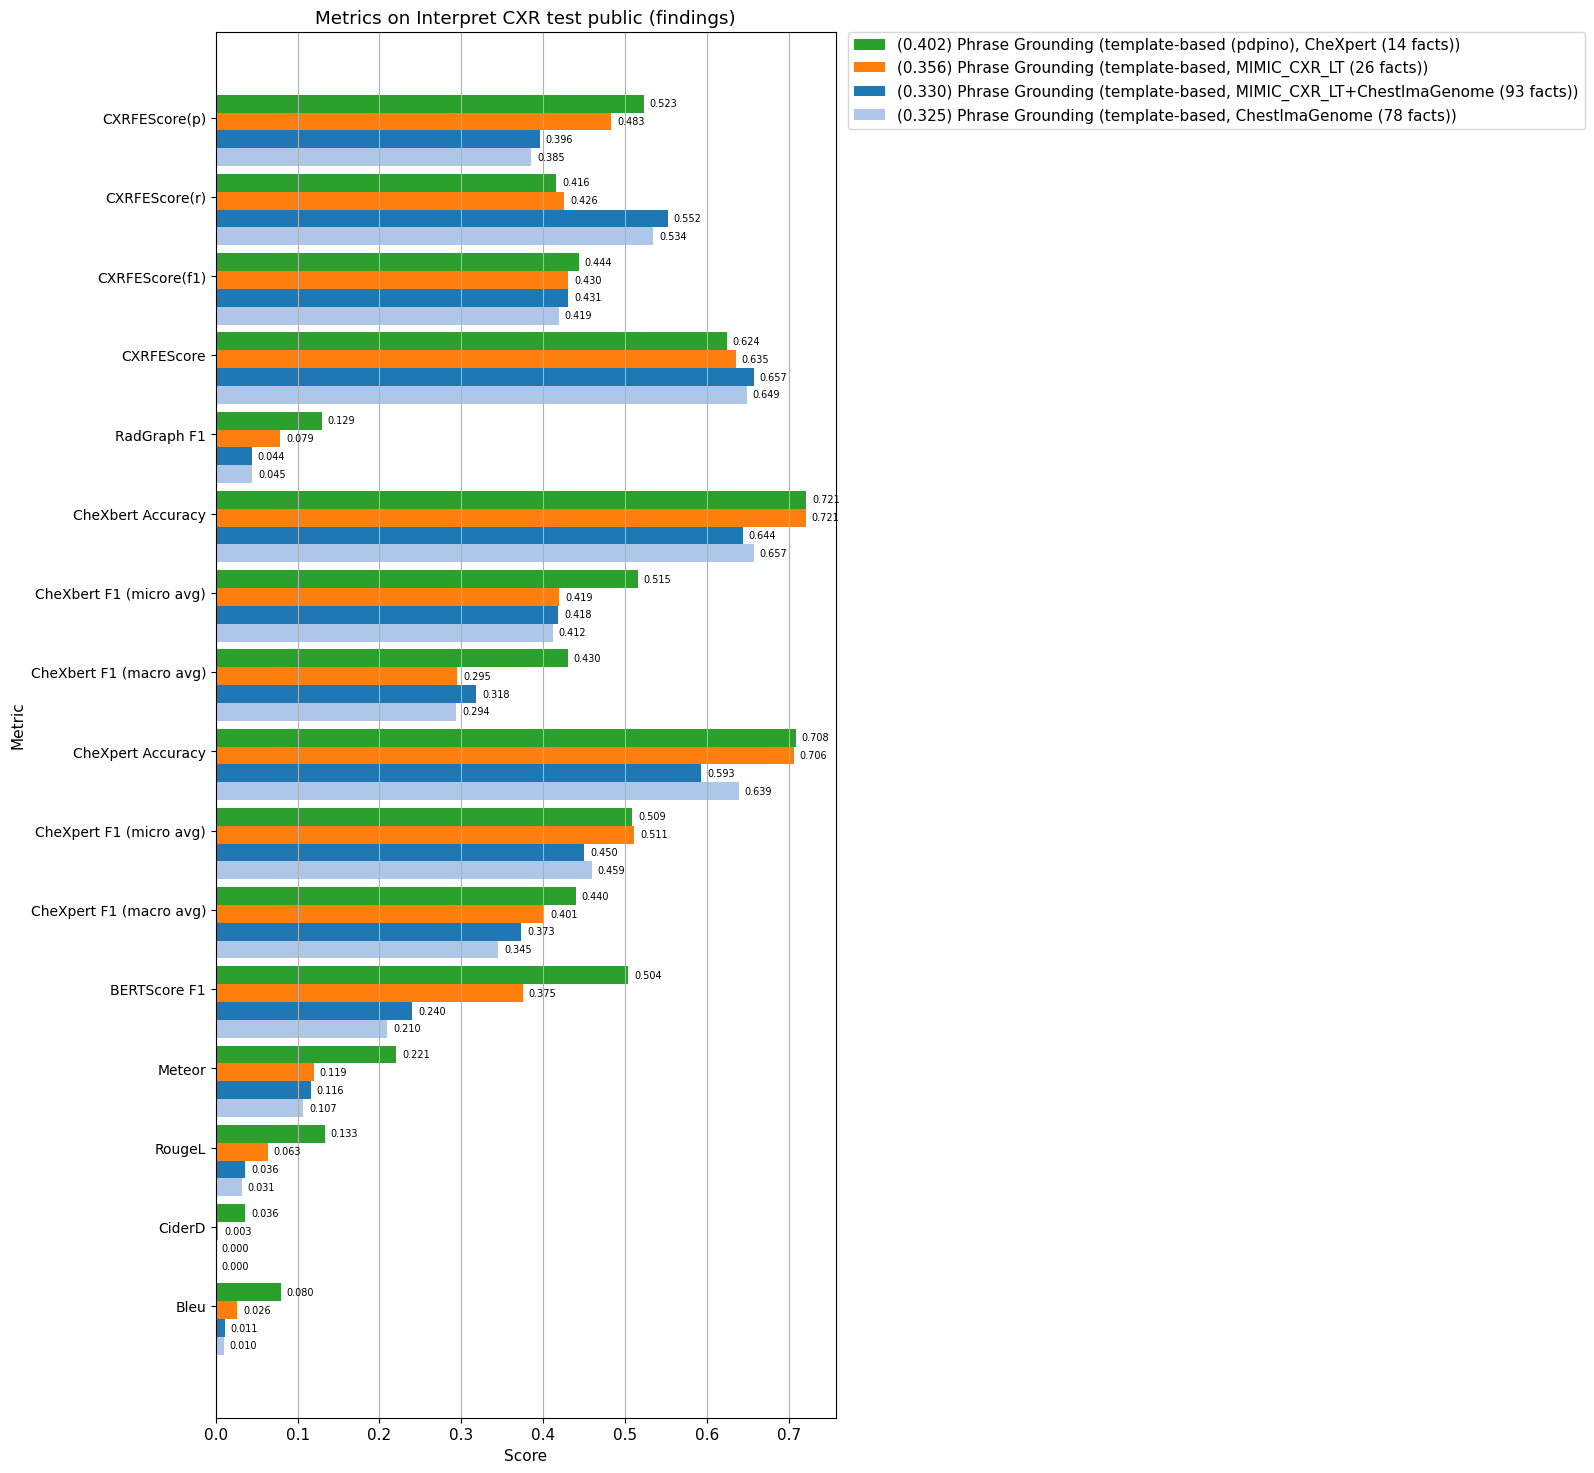

In [109]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_per_class_classification_metrics(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='Interpret CXR test public (findings)',
    figsize=(8, 18),
    sort_metrics=False,
)

In [70]:
from medvqa.utils.files import load_pickle
from medvqa.utils.math import rank_vectors_by_euclidean_distance
from IPython.display import Image

In [71]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr__label_based_probs_and_features(hash=270,2246280145995586625).pkl')

In [72]:
tmp.keys()

dict_keys(['image_paths', 'probs', 'features'])

In [73]:
tmp2 = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240511_045927_mim-facts+vinbig+chxp+iuxray_PhraseGrounder(dn121,128,256)/interpret_cxr__label_based_predictions(hash=368,3828061853141051818).pkl')

In [74]:
tmp2.keys()

dict_keys(['probs_and_features_filepath', 'thresholds', 'f1s', 'accs', 'class_names'])

In [75]:
tmp['probs'].shape

(826421, 93)

In [76]:
tmp['features'].shape

(826421, 256)

In [77]:
probs = tmp['probs']
features = tmp['features']

In [103]:
image_paths = tmp['image_paths']

/mnt/workspace/padchest/images-small/216840111366964012373310883942009191113137322_00-031-190.png

['artifact', 'calcified texture', 'cardiomegaly', 'enlarged cardiac silhouette', 'fluid overload/heart failure', 'interstitial texture', 'low lung volumes', 'rotated', 'skin fold', 'support devices']

Findings:
Bilateral hilar peribronchovascular thickening.
Impression:




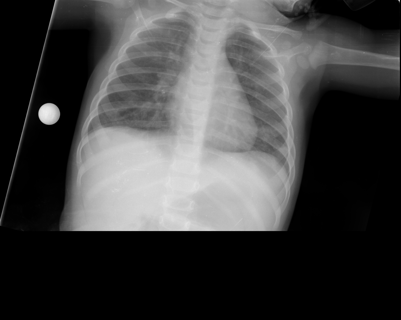

In [232]:
# q_idx = 100

# '/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_131_view_0.jpg',
# '/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_131_view_1.jpg',
# '/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_131_view_2.jpg'

# q_idx = image_paths.index('/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_131_view_0.jpg')
q_idx = image_paths.index('/mnt/workspace/padchest/images-small/216840111366964012373310883942009191113137322_00-031-190.png')

print(image_paths[q_idx])
print()
print([tmp2['class_names'][i] for i, x in enumerate(probs[q_idx] > tmp2['thresholds']) if x])
print()
get_report(image_paths[q_idx])
print()
Image(image_paths[q_idx])

In [233]:
# idxs = rank_vectors_by_euclidean_distance(probs, probs[q_idx])
idxs = rank_vectors_by_euclidean_distance(features, features[q_idx])
idxs = idxs.tolist()

In [234]:
i = idxs.index(image_paths.index('/mnt/workspace/padchest/images-small/216840111366964012373310883942009191113137322_00-031-190.png'))
i

0

In [235]:
import numpy as np

In [236]:
2 - np.abs((probs[i] - probs[q_idx])).mean() - np.abs((features[i] - features[q_idx])).mean()

1.8185981264518154

/mnt/workspace/padchest/images-small/216840111366964012819207061112010288095644715_03-186-153.png

['cardiomegaly', 'enlarged cardiac silhouette', 'fluid overload/heart failure', 'rotated', 'skin fold', 'support devices']

Findings:
without radiological alterations.
Impression:


1.933602921544544


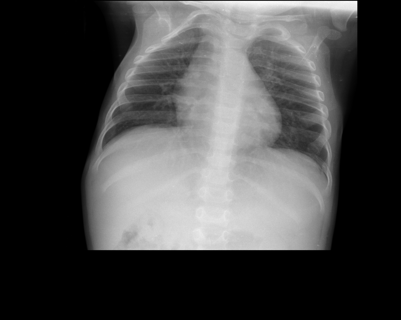

In [243]:
# i = 5
idx = idxs[12]
print(image_paths[idx])
print()
print([tmp2['class_names'][i] for i, x in enumerate(probs[idx] > tmp2['thresholds']) if x])
print()
get_report(image_paths[idx])
print()
print(2 - np.abs((probs[idx] - probs[q_idx])).mean() - np.abs((features[idx] - features[q_idx])).mean())
Image(image_paths[idx])

In [80]:
from importlib import reload
import medvqa

In [141]:
reload(medvqa.utils.files)
reload(medvqa.datasets.interpret_cxr_challenge)

<module 'medvqa.datasets.interpret_cxr_challenge' from '/home/pamessina/medvqa/medvqa/datasets/interpret_cxr_challenge/__init__.py'>

In [87]:
from medvqa.datasets.interpret_cxr_challenge import (
    MIMICCXR_ImageToReportMapper, OpenI_ImageToReportMapper, CheXpert_ImageToReportMapper, PadChest_ImageToReportMapper,
    BIMCV_COVID19_ImageToReportMapper, load_interpret_cxr_test_public_data,
)

In [82]:
mim_i2rm = MIMICCXR_ImageToReportMapper("/mnt/data/pamessina/workspaces/medvqa-workspace/cache/mimiccxr/background_findings_and_impression_20230612_174143.json")

Counter({'train': 217190, 'val': 5568})


In [83]:
oi_i2rm = OpenI_ImageToReportMapper()

Counter({'train': 3729, 'val': 97})


In [84]:
chexp_i2rm = CheXpert_ImageToReportMapper()

Counter({'train': 182199, 'val': 4603})


In [85]:
pad_i2rm = PadChest_ImageToReportMapper()

Counter({'train': 101752, 'val': 2641})


In [86]:
bimcv_i2rm = BIMCV_COVID19_ImageToReportMapper()

collision_count = 208
Counter({'train': 45525, 'val': 1202})


In [92]:
test_public_image_paths, test_public_reports = load_interpret_cxr_test_public_data('both' )

In [95]:
test_public_image_paths[0]

['/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg']

In [90]:
test_public_image_path2report = {}
for image_paths, report in zip(test_public_image_paths, test_public_reports):
    for ip in image_paths:
        assert ip not in test_public_image_path2report
        test_public_image_path2report[ip] = report

In [93]:
def get_report(image_path):
    if 'mimic' in image_path:
        x = mim_i2rm
    elif 'iu-x-ray' in image_path:
        x = oi_i2rm
    elif 'chexpert' in image_path:
        x = chexp_i2rm
    elif 'padchest' in image_path:
        x = pad_i2rm
    elif 'BIMCV_COVID19' in image_path:
        x = bimcv_i2rm
    elif 'test-public' in image_path:
        print('Findings + Impression:')
        print(test_public_image_path2report[image_path])
        return
    else: assert False
    print('Findings:')
    print(x.get_findings(image_path))
    print('Impression:')
    print(x.get_impression(image_path))

In [178]:
import pandas as pd

In [179]:
df = pd.read_csv('/mnt/workspace/interpret-cxr-test-public-jpg/public_source_pred.csv')

In [180]:
df

,Unnamed: 0,images_path,findings,impression,source_pred
0,0,['/mnt/researchers/denis-parra/datasets/interp...,Bedside upright AP radiograph of the chest dem...,1. Mild chronic congestive heart failure with ...,MIMIC-CXR
1,1,['/mnt/researchers/denis-parra/datasets/interp...,"Since most recent chest radiograph, there has ...",Right IJ central venous catheter terminates pr...,MIMIC-CXR
2,2,['/mnt/researchers/denis-parra/datasets/interp...,NaN,There has been interval increase in right lowe...,MIMIC-CXR
3,3,['/mnt/researchers/denis-parra/datasets/interp...,"As compared to the previous radiograph, the kn...",NaN,PadChest
4,4,['/mnt/researchers/denis-parra/datasets/interp...,There are no focal opacities. The patient has ...,No evidence of acute cardiopulmonary process.,CheXpert
...,...,...,...,...,...
3672,3672,['/mnt/researchers/denis-parra/datasets/interp...,"The lungs are clear. There is no effusion, con...",Normal chest x-ray.,CheXpert
3673,3673,['/mnt/researchers/denis-parra/datasets/interp...,Lungs are relatively hyperinflated with the ca...,No definite acute cardiopulmonary process.,CheXpert
3674,3674,['/mnt/researchers/denis-parra/datasets/interp...,The lungs are well expanded and clear. Coarsen...,No acute cardiopulmonary process. Unchanged ca...,BIMCV-COVID19
3675,3675,['/mnt/researchers/denis-parra/datasets/interp...,Bibasilar opacities are again seen silhouettin...,Moderate bilateral pleural effusions with adja...,MIMIC-CXR


In [181]:
df2 = pd.read_csv('/mnt/workspace/interpret-cxr-test-hidden-jpg/hidden_source_pred.csv')

In [186]:
from collections import Counter

In [188]:
Counter(df.source_pred)

Counter({'MIMIC-CXR': 1455,
         'PadChest': 102,
         'CheXpert': 1484,
         'OpenI': 335,
         'BIMCV-COVID19': 301})

In [187]:
Counter(df2.source_pred)

Counter({'MIMIC-CXR': 937,
         'CheXpert': 522,
         'OpenI': 106,
         'BIMCV-COVID19': 91,
         'PadChest': 37})